# MCA poison - ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_music
Music = load_music()
Music

,FrenchPop,Rap,Rock,Jazz,Classical,Gender,Age,OnlyMus,Daily
0,NA,No,Yes,No,No,Men,25-49,Rare,No
1,No,Yes,No,NA,No,Women,15-24,Often,Yes
2,No,No,Yes,No,No,Women,15-24,Daily,Yes
3,No,No,Yes,No,No,Women,15-24,Rare,Yes
4,Yes,No,No,No,Yes,Women,25-49,Never,No
...,...,...,...,...,...,...,...,...,...
495,Yes,No,No,No,No,Women,50+,Never,No
496,Yes,No,No,No,No,Women,50+,Never,No
497,Yes,Yes,No,No,No,Men,15-24,Often,No
498,Yes,No,Yes,No,Yes,Women,25-49,Never,Yes


In [3]:
import pandas as pd
from scientisttools import SpecificMCA
# Junk 
excl = {"FrenchPop" : "NA", 
        "Rap" : "NA" , 
        "Rock" : "NA", 
        "Jazz" : "NA",
        "Classical" : "NA"}

music = pd.concat((Music, Music),ignore_index=True)
res_spemca = SpecificMCA(n_components=5,excl=excl,quali_sup=list(range(5,Music.shape[1])),ind_sup=list(range(500,music.shape[0])))
res_spemca.fit(music)

SpecificMCA(excl={'Classical': 'NA', 'FrenchPop': 'NA', 'Jazz': 'NA',
                  'Rap': 'NA', 'Rock': 'NA'},
            ind_sup=[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
                     512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523,
                     524, 525, 526, 527, 528, 529, ...],
            quali_sup=[5, 6, 7, 8])

## Eigenvalues

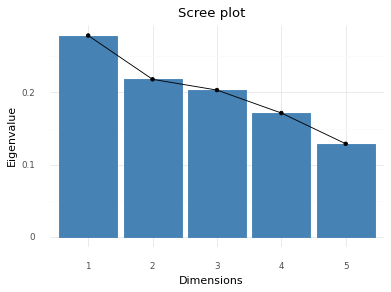

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_spemca,choice="eigenvalue")
print(p)

## Individuals

### Color by RGB

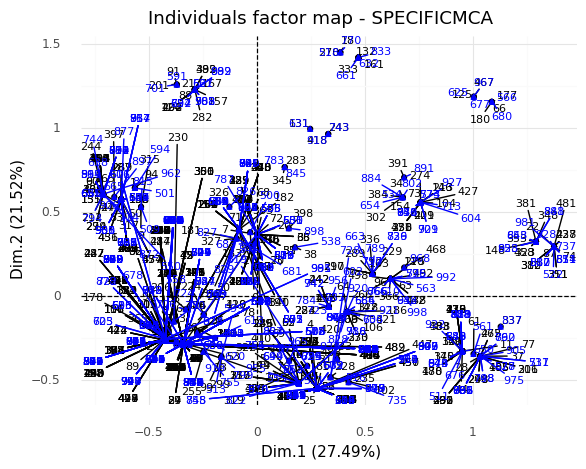

In [5]:
from scientisttools import fviz_mca_ind
p = fviz_mca_ind(res_spemca,repel=True)
print(p) 

### Color by cos2

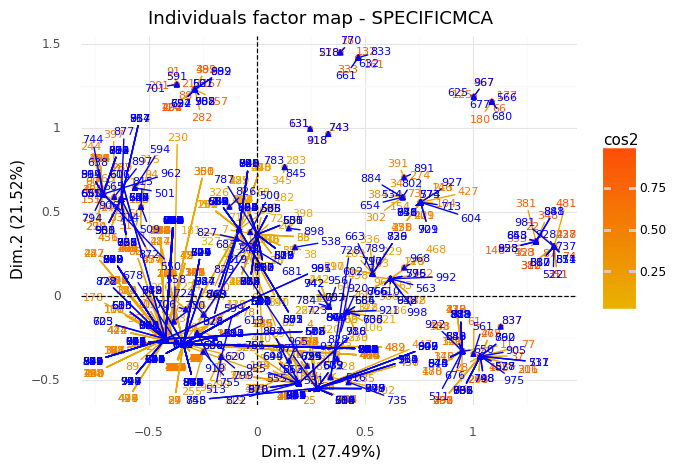

In [6]:
p = fviz_mca_ind(res_spemca,color="cos2",repel=True)
print(p)

### Color by contrib

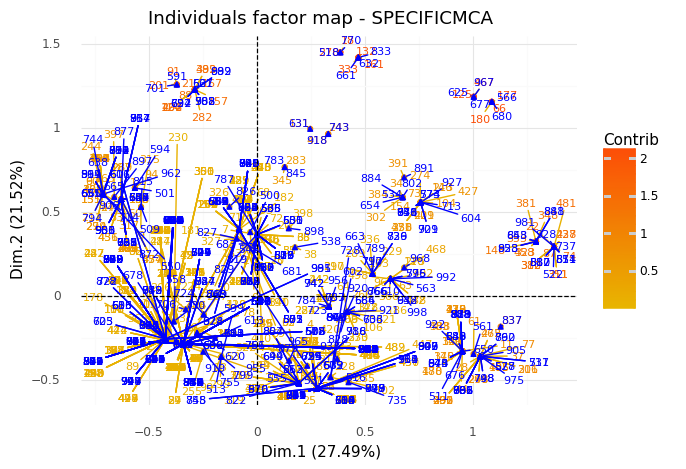

In [7]:
p = fviz_mca_ind(res_spemca,color="contrib",repel=True)
print(p)

## Color by quantitatives variables

In [8]:
#p = fviz_mca_ind(res_spemca,color="Age",repel=True)
#print(p)

### Color by active qualitatives columns

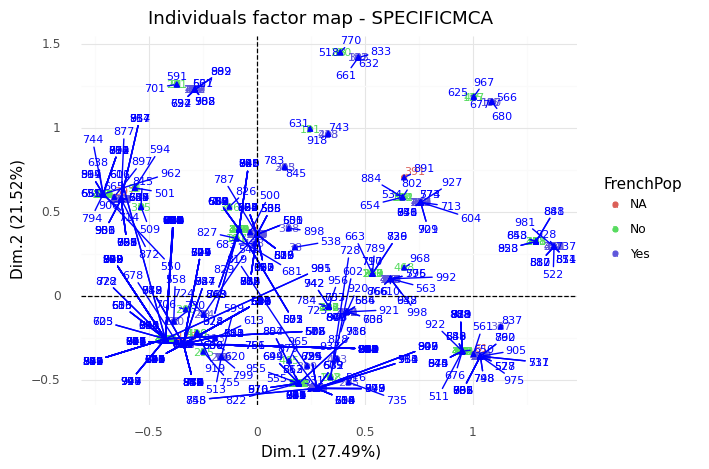

In [9]:
p = fviz_mca_ind(res_spemca,habillage=Music.columns.tolist()[0],repel=True)
print(p)

### Color by supplementary qualitatives columns

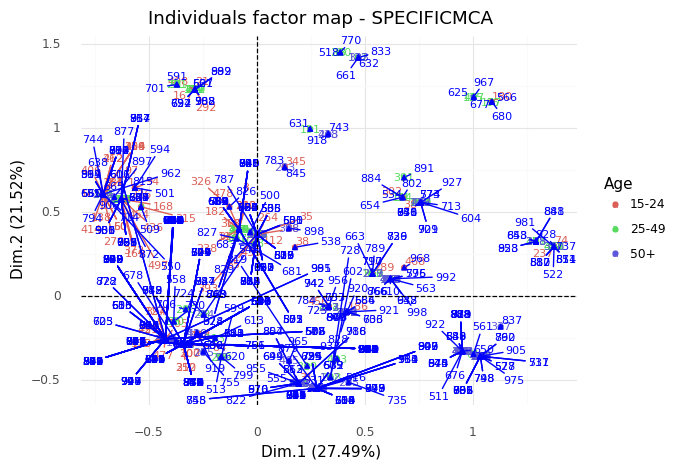

In [10]:
p = fviz_mca_ind(res_spemca,habillage=Music.columns.tolist()[6],repel=True)
print(p)

### Color by numpy array

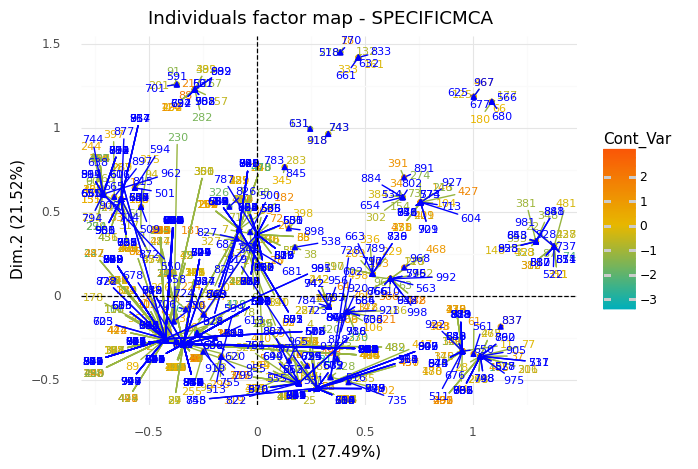

In [11]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_spemca.call_["X"].shape[0])
p = fviz_mca_ind(res_spemca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

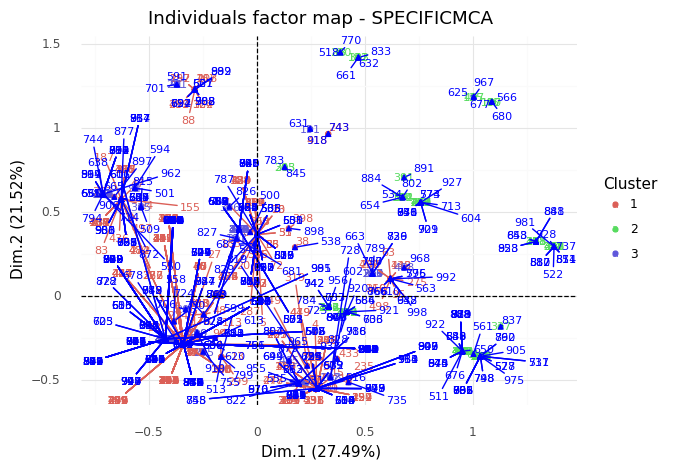

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_spemca.ind_["coord"])
p = fviz_mca_ind(res_spemca,color=kmeans,repel=True)
print(p)

### set limits

#### limit cos2

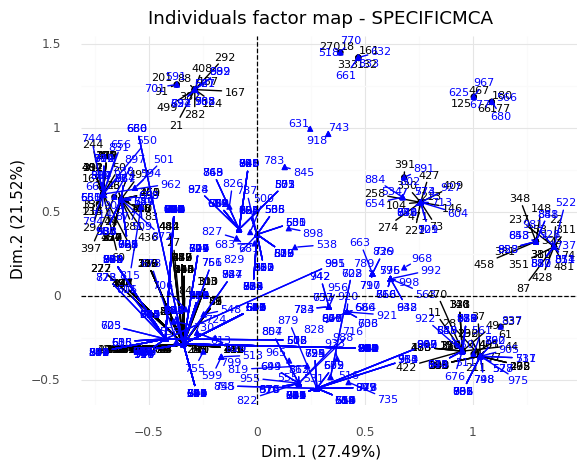

In [13]:
p = fviz_mca_ind(res_spemca,lim_cos2=0.5,repel=True)
print(p)

#### limit contrib

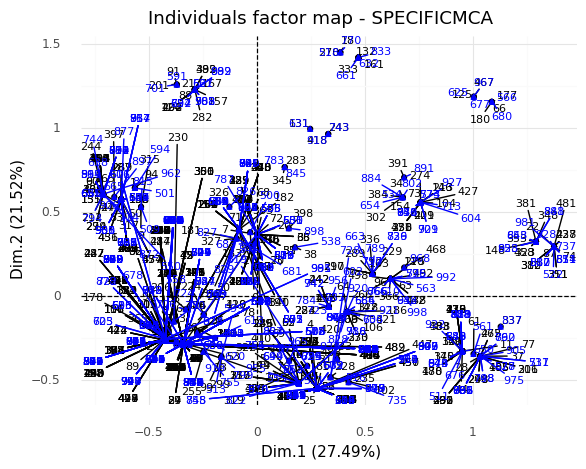

In [14]:
p = fviz_mca_ind(res_spemca,lim_contrib=20,repel=True)
print(p)

## Variables

### Color by RGB colors

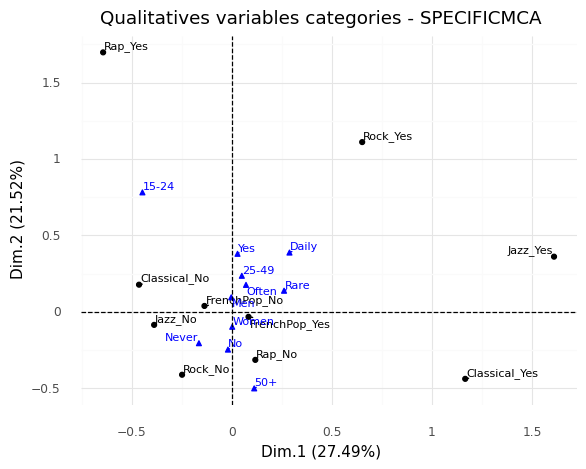

In [15]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(res_spemca,repel=True)
print(p)

### Color by cos2

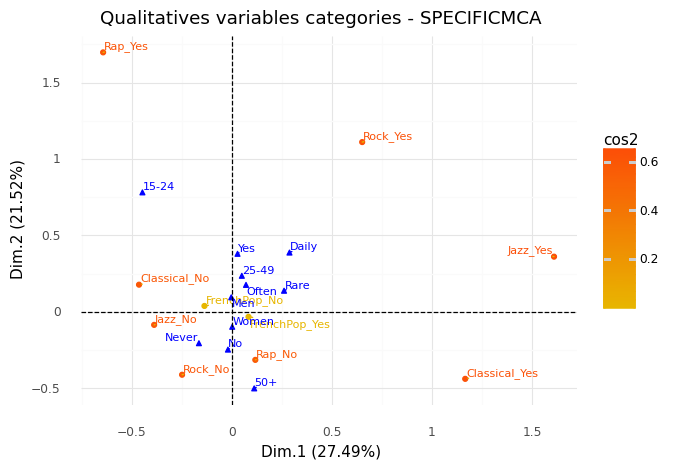

In [16]:
p = fviz_mca_mod(res_spemca,color="cos2",repel=True)
print(p)

### Color by contrib

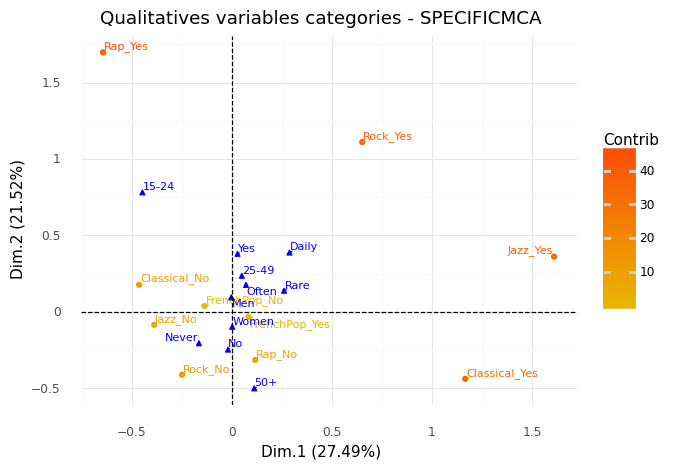

In [17]:
p = fviz_mca_mod(res_spemca,color="contrib",repel=True)
print(p)

### Color by numpy array

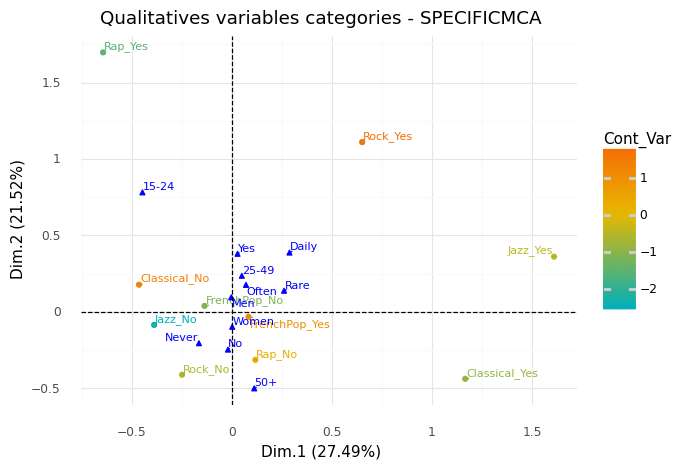

In [18]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_spemca.var_["coord"].shape[0])
p = fviz_mca_mod(res_spemca,color=color_numpy,repel=True)
print(p)

### Color by kmeans clustering

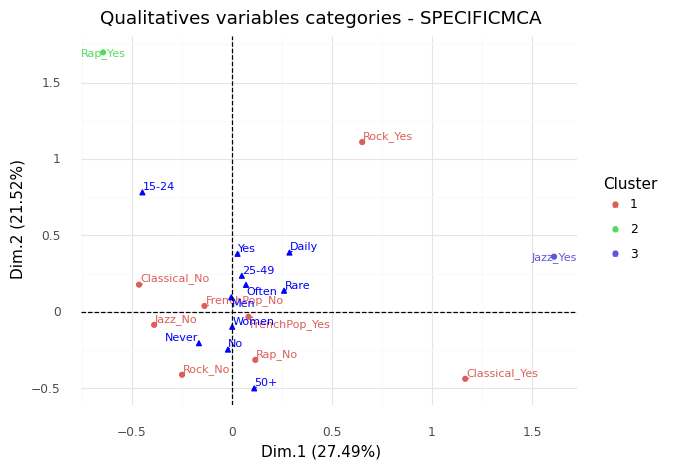

In [19]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_spemca.var_["coord"])
p = fviz_mca_mod(res_spemca,color=kmeans,repel=True)
print(p)

### change text type

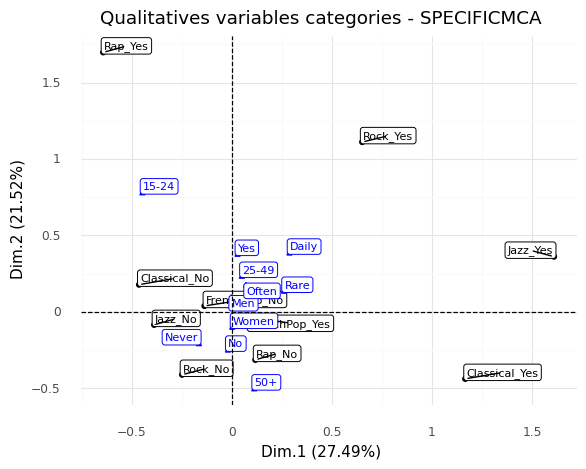

In [20]:
p = fviz_mca_mod(res_spemca,text_type="label",repel=True)
print(p)

### Set tlimits

#### limit cos2

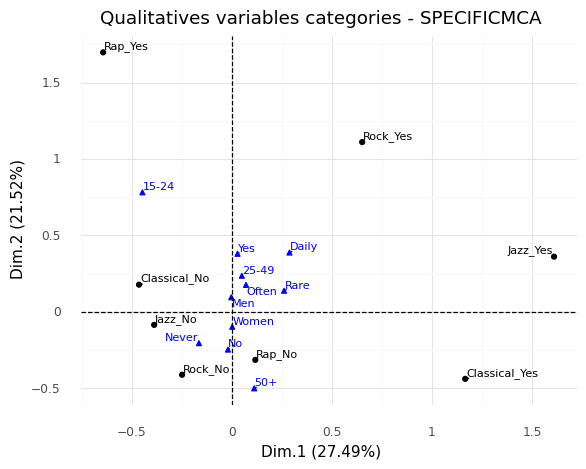

In [21]:
p = fviz_mca_mod(res_spemca,lim_cos2=0.3,repel=True)
print(p)

#### limit contrib

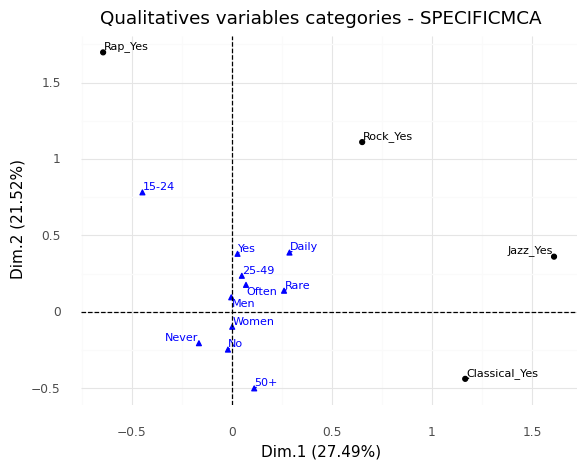

In [22]:
p = fviz_mca_mod(res_spemca,lim_contrib=20,repel=True)
print(p)

## Global variables

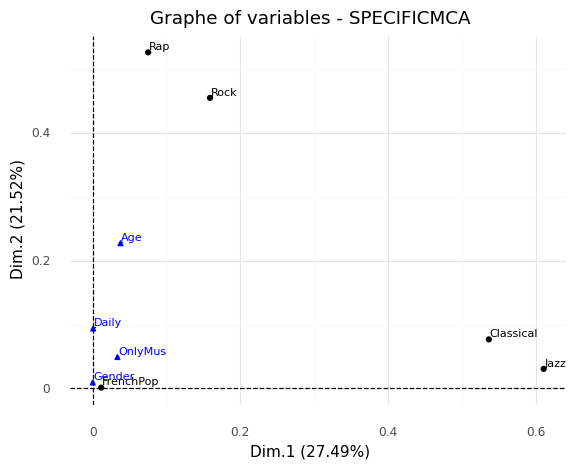

In [23]:
from scientisttools import fviz_mca_var
p  = fviz_mca_var(res_spemca,repel=True)
print(p)

### Correlation circle

In [24]:
from scientisttools import fviz_corrcircle
#p = fviz_corrcircle(res_spemca)
#print(p)

## Plot contributions

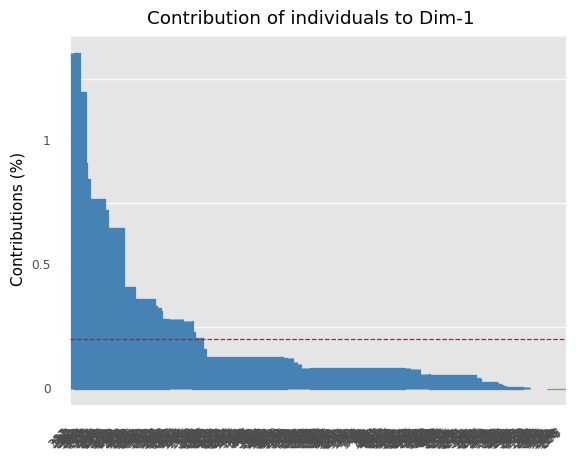

In [25]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_spemca,choice="ind")
print(p)

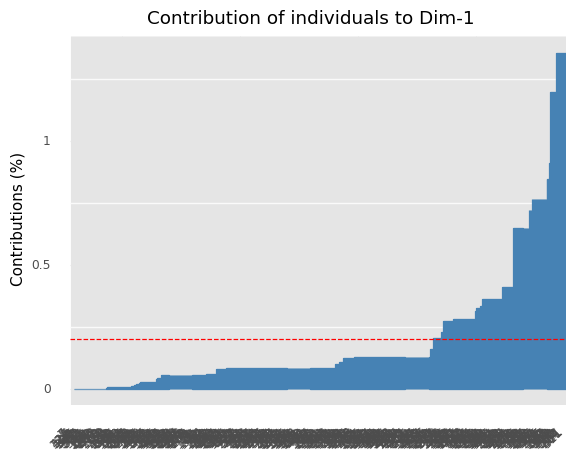

In [26]:
p = fviz_contrib(res_spemca,choice="ind",sort_contrib="asc")
print(p)

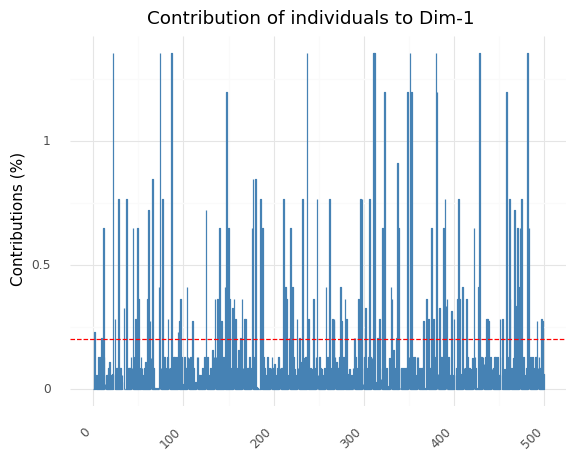

In [27]:
p = fviz_contrib(res_spemca,choice="ind",sort_contrib="none")
print(p)

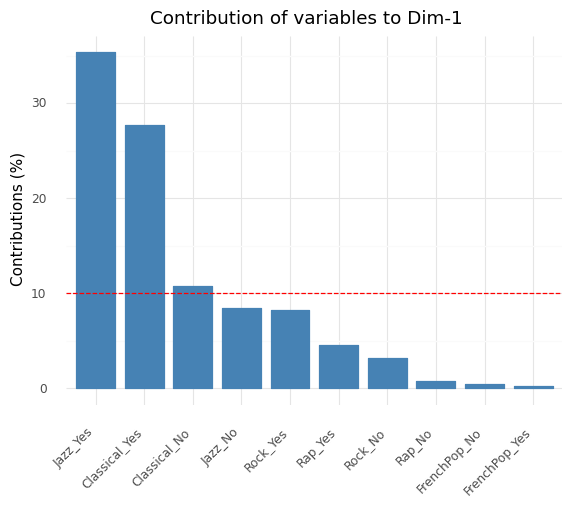

In [28]:
p = fviz_contrib(res_spemca,choice="var")
print(p)

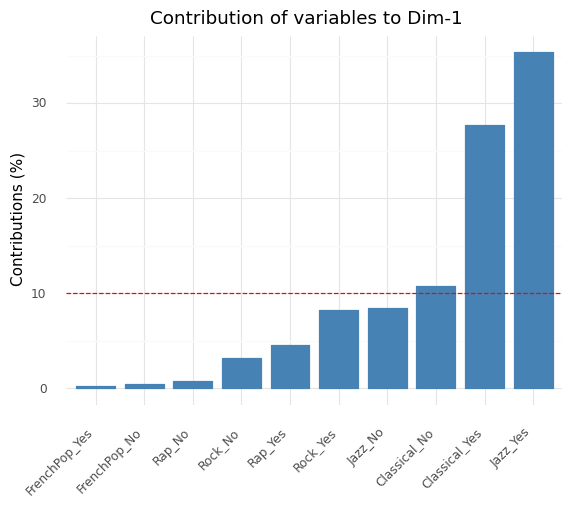

In [29]:
p = fviz_contrib(res_spemca,choice="var",sort_contrib="asc")
print(p)

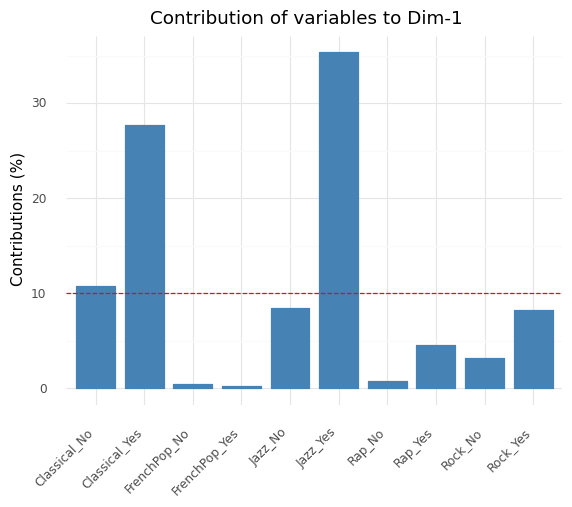

In [30]:
p = fviz_contrib(res_spemca,choice="var",sort_contrib="none")
print(p)

## plot cos2

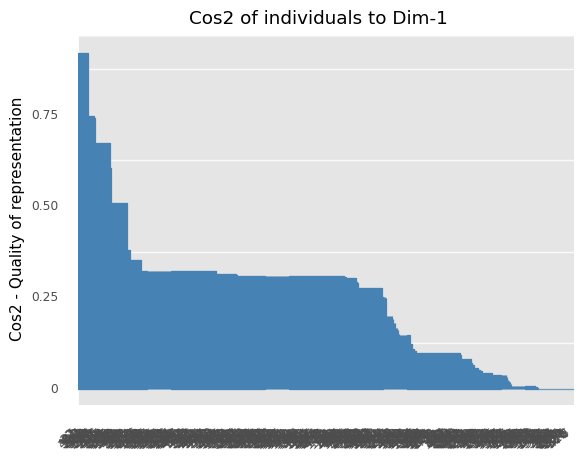

In [31]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_spemca)
print(p)

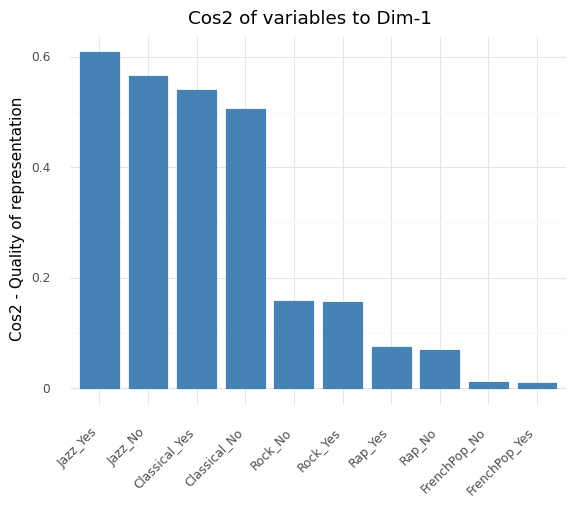

In [32]:
p = fviz_cos2(res_spemca,choice = "var")
print(p)